In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [68]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date")

In [69]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [70]:
# Clean data by removing anything smaller than 2.5% quantile or greater than 97.5% quantile
df = df[(df["value"] > df["value"].quantile(0.025)) & (df["value"] < df["value"].quantile(0.975))]

In [71]:
df.index = pd.to_datetime(df.index) #  Change index to datetime format

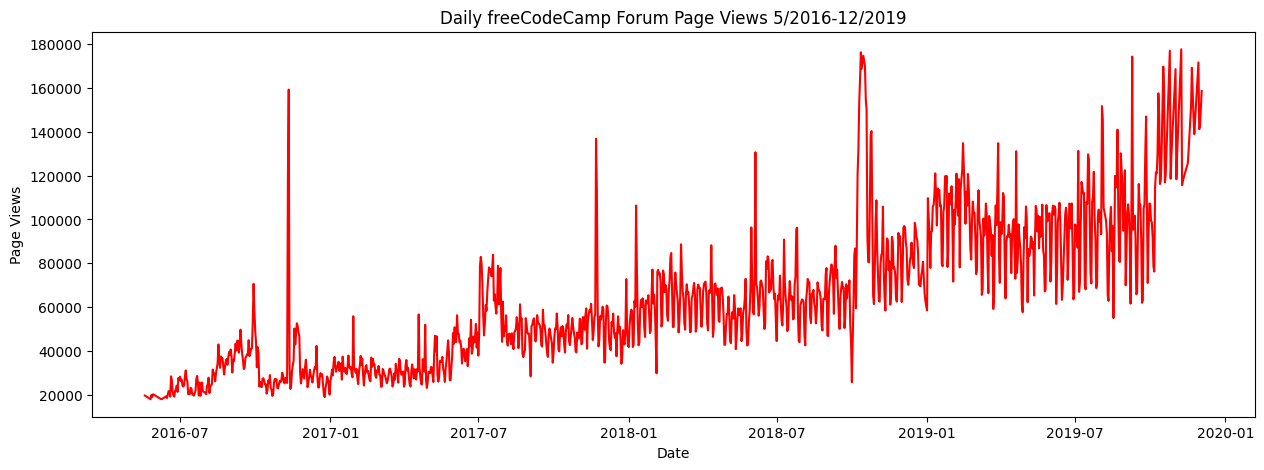

In [72]:
fig, ax= plt.subplots(figsize=(15,5))
ax.title.set_text("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
ax.locator_params(axis="x", nbins=5, tight=True)
ax.plot(df,"r")

In [83]:
# Create dataframe for barplot
df_bar = df.resample("M").mean() # Resample dataframe to take average of each moth
df_bar["Months"] = df_bar.index.strftime("%B") # Add month column
df_bar["Years"] = df_bar.index.year.astype(int) # Add year column
df_bar = df_bar.rename(columns={"value":"Average Page Views"}) # Rename "value" to average page views
df_bar.index = df_bar.index.strftime("%Y-%m") # Reformat index as a string showing date

In [84]:
# Insert missing data in 2016, the first four months
missing_data = {
    "Years": [2016, 2016, 2016, 2016],
    "Months": ['January', 'February', 'March', 'April'],
    "Average Page Views": [0, 0, 0, 0]
}

df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

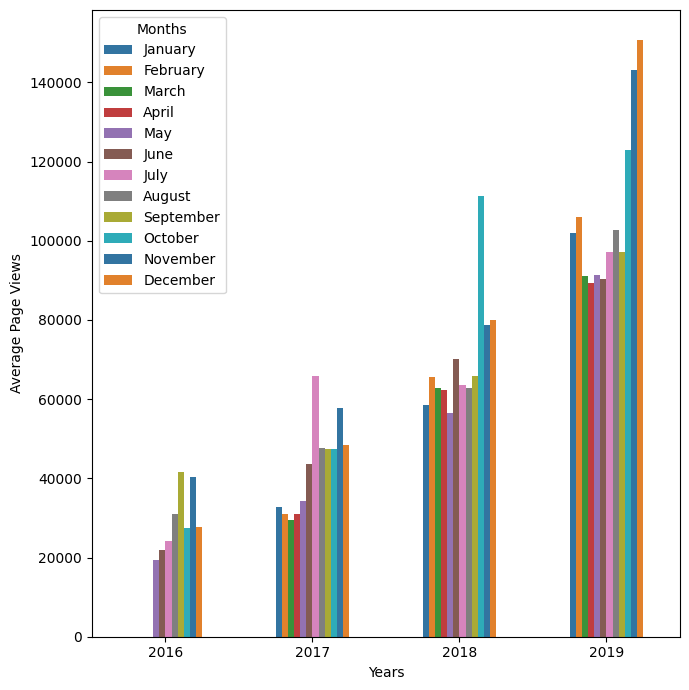

In [87]:
fig,ax = plt.subplots(figsize=(7,7))
ax = sns.barplot(df_bar, 
                 x="Years", 
                 y="Average Page Views", 
                 hue="Months", 
                 palette="tab10",
                width=0.5)
plt.tight_layout()

In [48]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [50]:
df_box

,date,value,year,month
0,2016-06-17,21691,2016,Jun
1,2016-06-18,21681,2016,Jun
2,2016-06-20,28508,2016,Jun
3,2016-06-21,26805,2016,Jun
4,2016-06-25,21923,2016,Jun
...,...,...,...,...
1171,2019-11-03,130118,2019,Nov
1172,2019-11-09,115642,2019,Nov
1173,2019-11-10,117717,2019,Nov
1174,2019-11-16,125634,2019,Nov


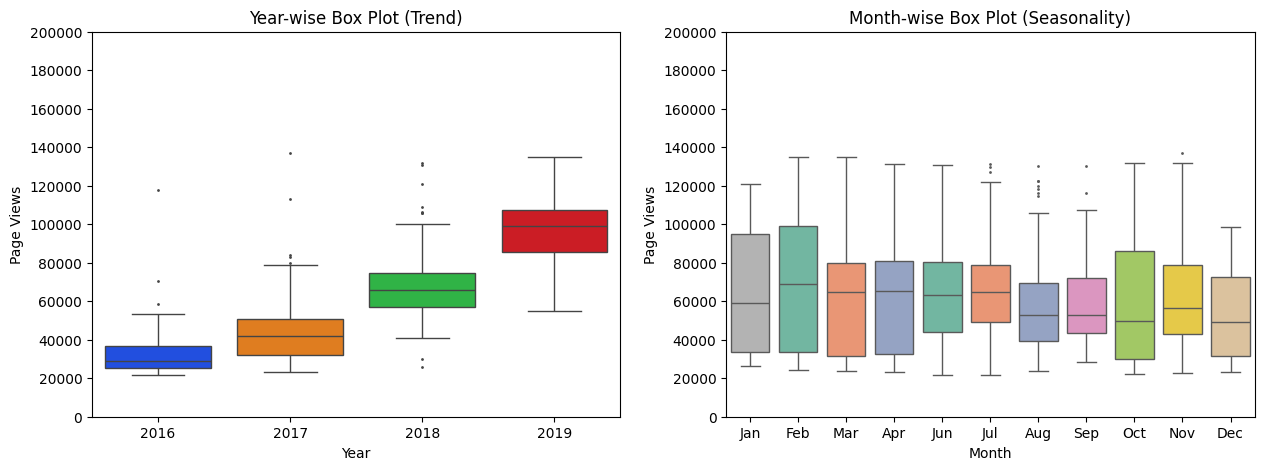

In [65]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

# First plot
ax[0].title.set_text("Year-wise Box Plot (Trend)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Page Views")
#ax[0].set_ylim([0,200000])
#ax[0].locator_params(axis="y", nbins=10, tight=True)
sns.boxplot(df_box, x="year", y="value", ax=ax[0], hue="year", palette="bright", legend=False, fliersize=1)

# Second plot
ax[1].title.set_text("Month-wise Box Plot (Seasonality)")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Page Views")
#ax[1].set_ylim([0,200000])
sns.boxplot(df_box, x="month", y="value", ax=ax[1], hue="month", order=["Jan", "Feb", "Mar", "Apr", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], palette="Set2", fliersize=1)

for ax in ax:
    ax.set_ylim([0,200000])
    ax.locator_params(axis="y", nbins=10, tight=True)
